In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [2]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


## Part 1: Add a column for GDP per Capita (5pts)

Show print the labels along with just that column. Print 10 random rows of that data. 

<b>Note: you'll have to look at the units to ensure you get it right.</b>

In [3]:
#Part 1
dfLE['GDPcap'] = dfLE['GDP'] / dfLE['Population']
dfLE.head(10)

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPcap
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250,414.824126
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750,1674.441147
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250,3392.912329
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375,2146.263722
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375,NaN
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.3750,92.3750,1.641579e+11,2.012120e+07,16.50625,8158.454561
6,Armenia,0.0,73.40000,117.3750,1.0000,3.702667,87.562500,274.2500,44.70625,1.0000,89.1250,87.3750,2.901137e+09,1.015165e+06,11.78750,2857.799550
7,Australia,1.0,81.81250,63.1875,1.0000,10.155333,93.400000,103.9375,55.86250,1.3750,86.7500,86.8750,2.905302e+11,4.587010e+06,20.03750,63337.610450
8,Austria,1.0,81.48125,65.7500,0.0000,12.236000,81.062500,77.2500,48.28750,0.0000,86.0000,86.7500,2.259544e+11,6.474880e+06,15.38750,34897.075919
9,Azerbaijan,0.0,70.73125,115.1875,6.0625,0.992000,59.214286,598.1875,43.84375,7.1875,75.8125,82.3125,6.669684e+09,2.157370e+06,11.35000,3091.580405


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

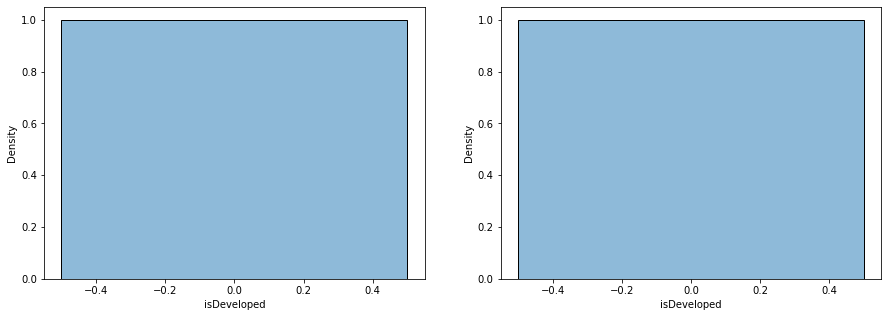

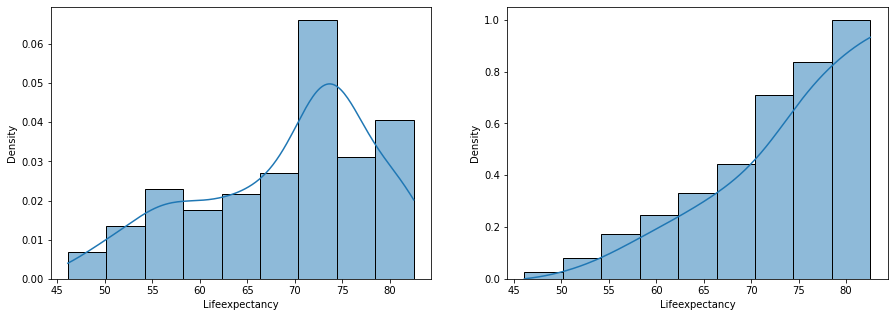

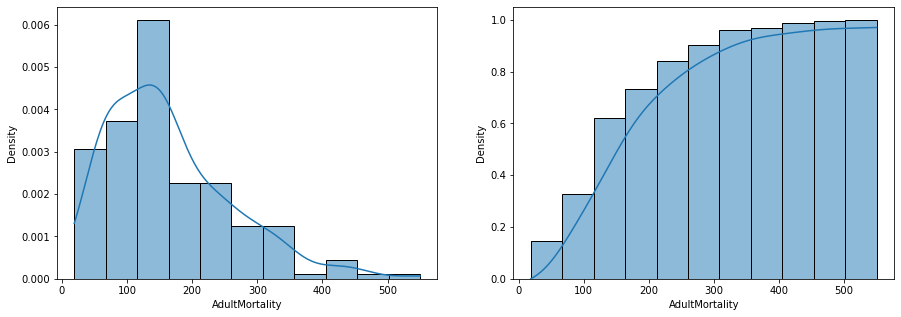

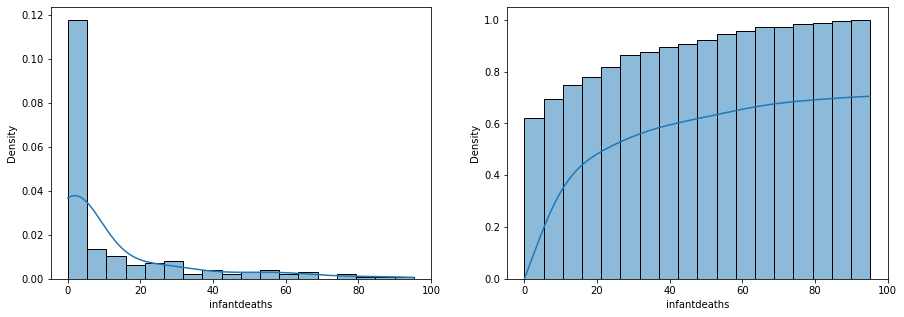

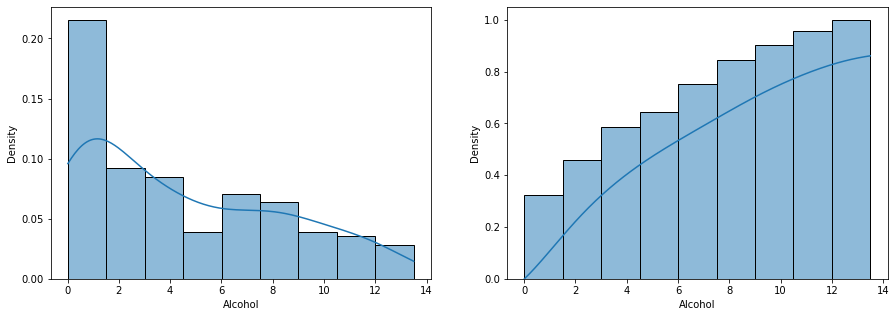

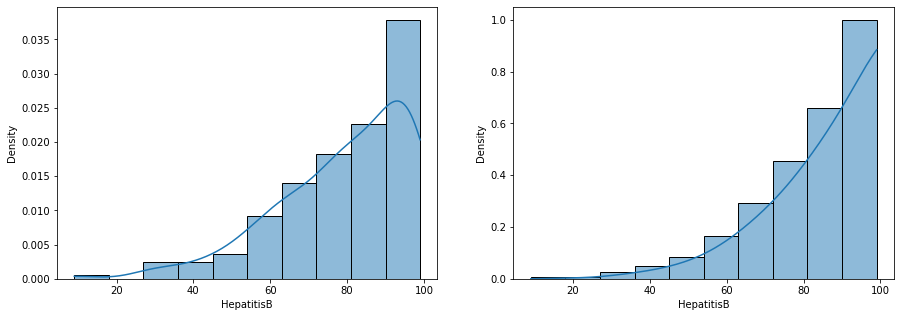

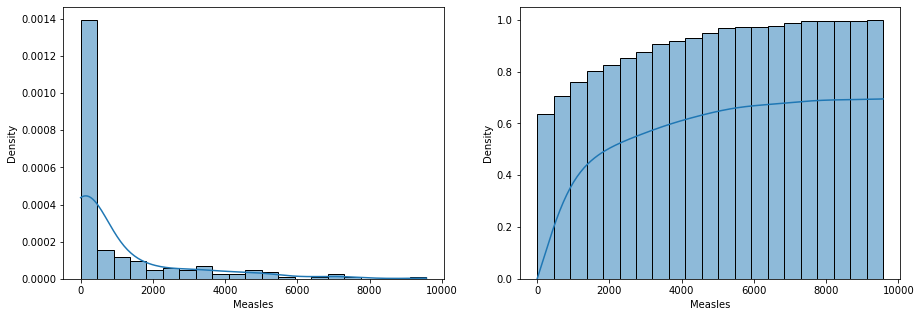

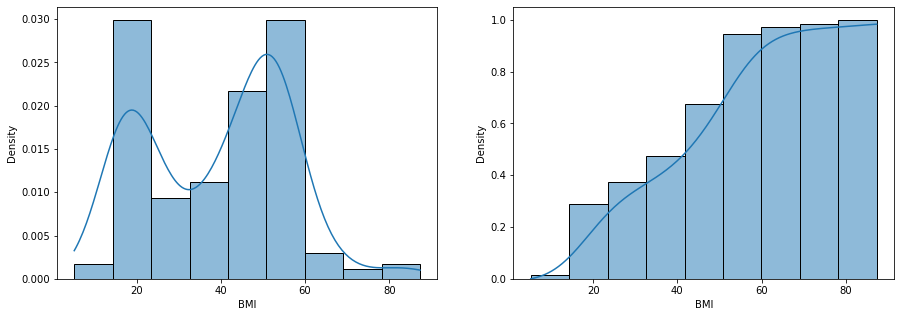

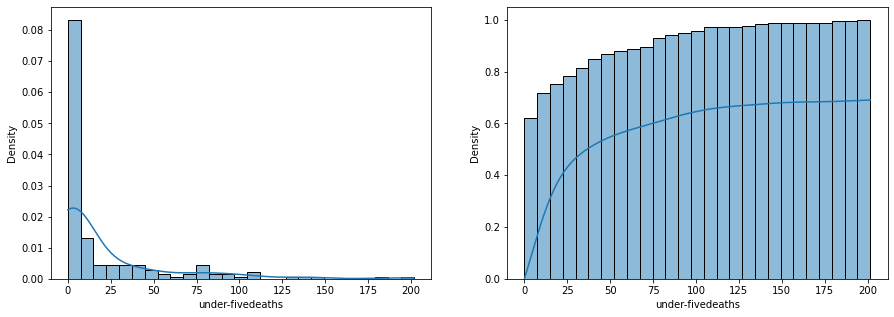

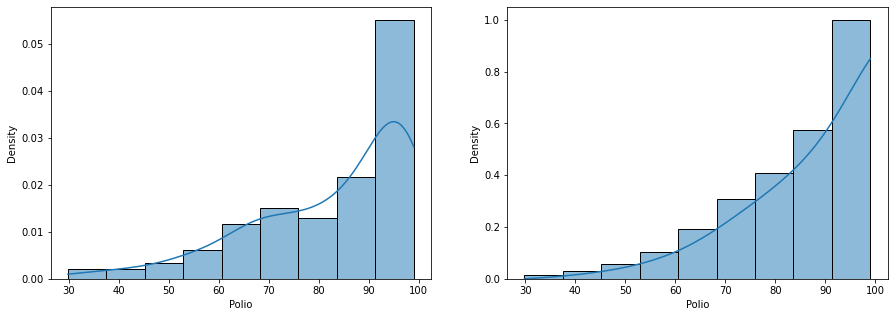

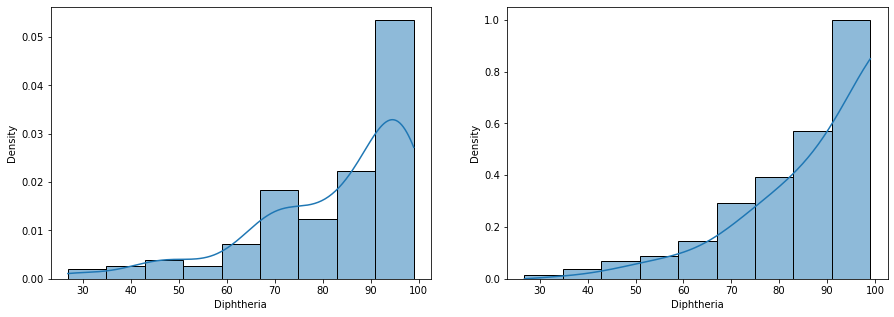

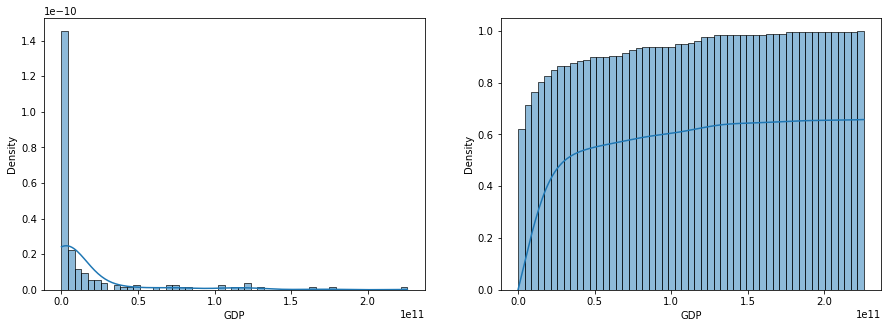

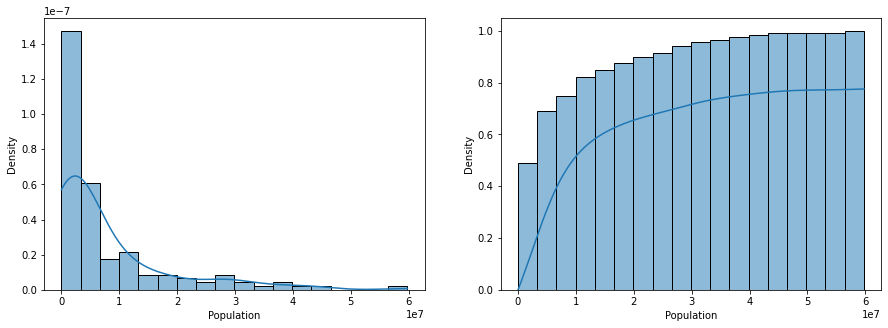

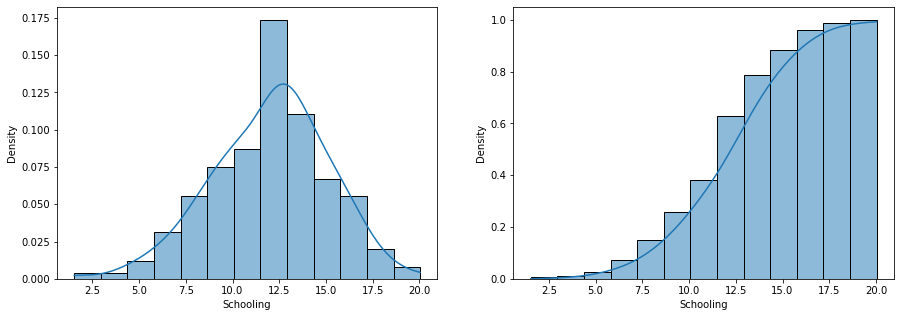

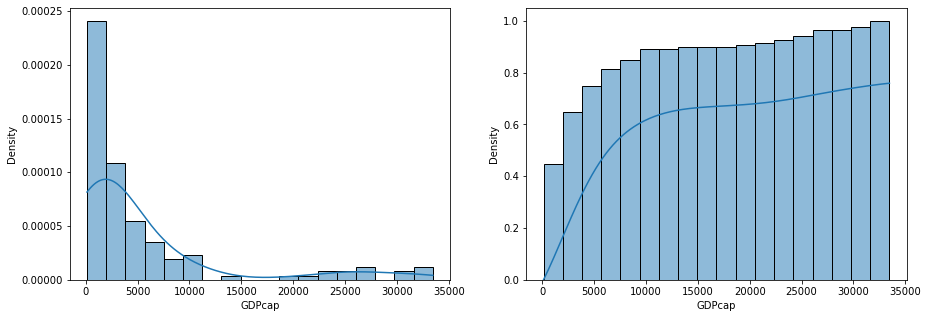

In [4]:
#Print all distributions
#Print all histograms
listCol = dfLE.columns
#print(listCol)
listFilt = []
fence=5
for i in listCol:
    if i != "Country":
        tmp = pd.Series(dfLE[i])
        tmpMean = tmp.mean()
        tmp = tmp[tmp<(tmpMean*fence)]
        f, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
        #sns.displot(data=tmp, kde=True, ax=axes[0, 0])
        sns.histplot(data=tmp, kde=True, ax=axes[0], stat="density")
        sns.histplot(data=tmp, kde=True, ax=axes[1], cumulative=True, stat="density")
        listFilt.append(tmp)

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

<b>Note:</b> there are different distributions that would work here. As long as you're in the ballpark it is fine. Answers vary a bit depending on the distribution, also fine. 

Distribution - Skew Normal


<AxesSubplot:xlabel='Schooling', ylabel='Density'>

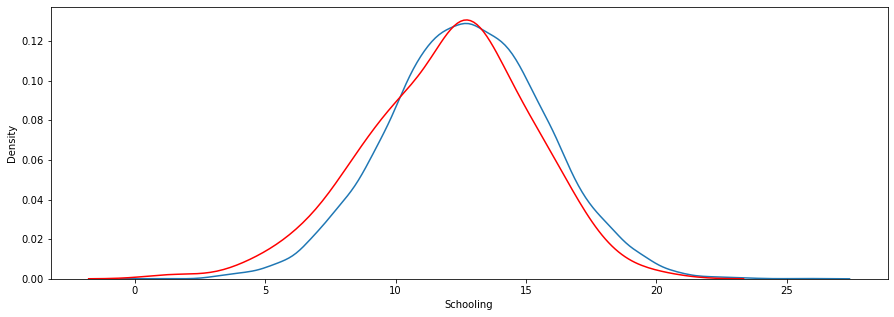

In [5]:
#Analytical for Schooling
aSchool = ss.skewnorm.rvs(.3, loc=dfLE["Schooling"].mean(), scale=dfLE["Schooling"].std(), size=10000)
print("Distribution - Skew Normal")
sns.kdeplot(aSchool)
sns.kdeplot(dfLE.Schooling, color="red")

In [6]:
# Within a Year
canada = dfLE[dfLE['Country'] == 'Canada']['Schooling'].mean()
aschool_cdf = thinkstats2.Cdf(aSchool, label='Analytical')
aschool_cdf.PercentileRank(canada+1) - aschool_cdf.PercentileRank(canada-1)


15.679999999999993

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

In [7]:
dfLE["GDPcap"].describe()

count      144.000000
mean      6886.716335
std      11457.048602
min        117.466394
25%        735.594643
50%       2424.224604
75%       6083.726099
max      63337.610450
Name: GDPcap, dtype: float64

I'm lognormal. GDP/cap is probably ok


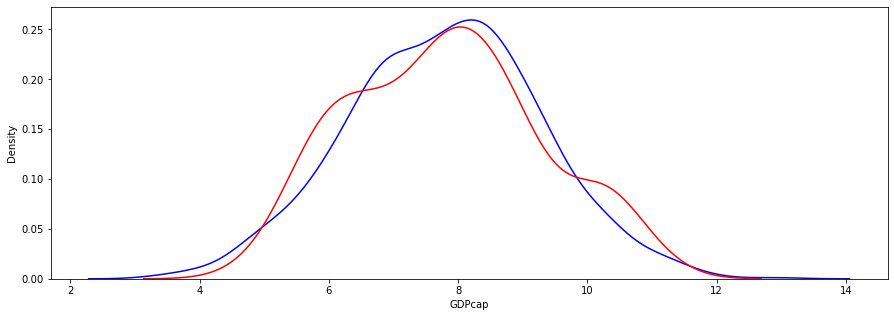

In [8]:
#Analytical for GDP/capita
#clean up data and chart the emperical CDF
#Create a series in Pandas and log it
cap=pd.Series(dfLE["GDPcap"].dropna())
cap=np.log(cap)
#Create Log normal Analytical distribution for gdp_par.
lgnorm = ss.norm(loc=cap.mean(), scale=cap.std())


sns.kdeplot(lgnorm.rvs(size=1000), legend="CDF- Analytical", color="blue")
sns.kdeplot(np.log(dfLE["GDPcap"]), legend="CDF- Emperical", color="red")
print("I'm lognormal. GDP/cap is probably ok")

In [9]:
lgnorm

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [10]:
#Visualize correlations. 
sns.pairplot(data=dfLE, hue="isDeveloped")

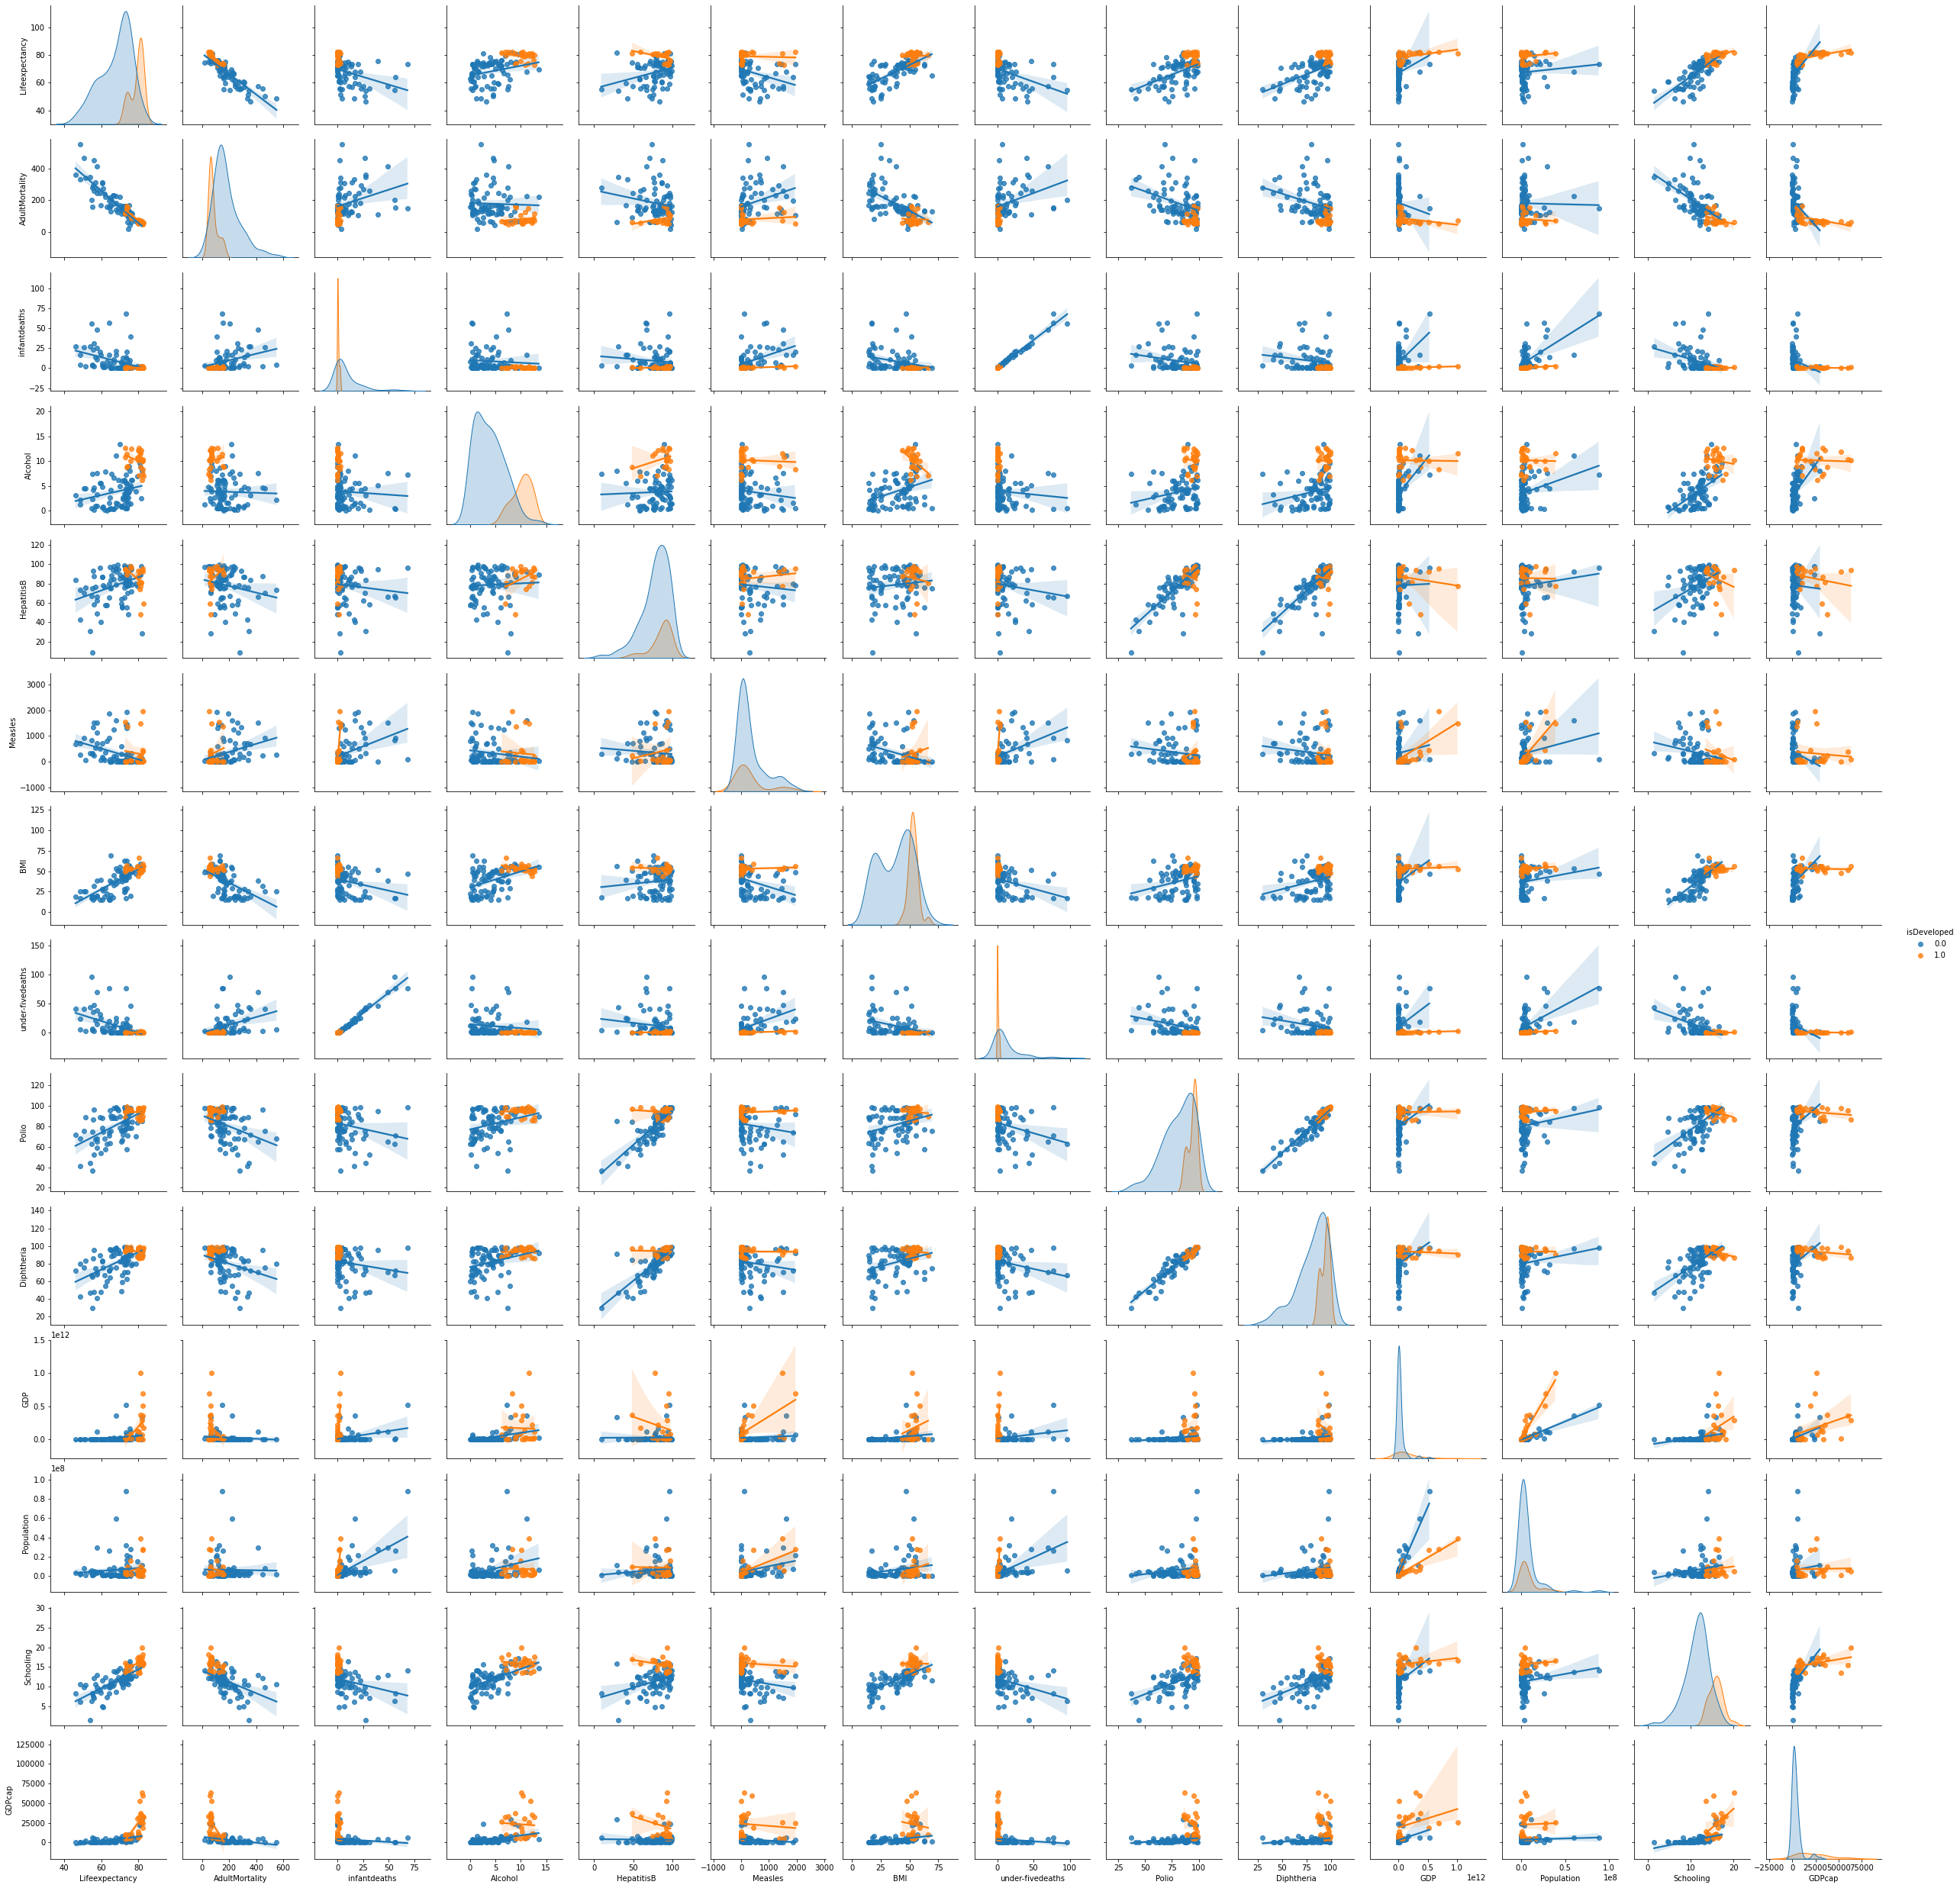

In [ ]:
#Visualize correlations. 
#dfLE.drop(columns={"GDPcap"}, inplace=True)
dfLE = dfLE[dfLE["infantdeaths"] < 500]
dfLE = dfLE[dfLE["Lifeexpectancy"] > 0]
dfLE = dfLE[dfLE["under-fivedeaths"] < 500]
dfLE = dfLE[dfLE["Population"] < 500000000]
dfLE = dfLE[dfLE["Measles"] < 2000]
sns.pairplot(data=dfLE, hue="isDeveloped", kind="reg")

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [ ]:
dfLE.corr()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPcap
isDeveloped,1.000000,0.530270,-0.425079,-0.278989,0.702230,0.169746,-0.018238,0.445482,-0.272644,0.382644,0.356565,0.394255,0.031872,0.588428,0.656150
Lifeexpectancy,0.530270,1.000000,-0.892197,-0.440694,0.497173,0.318141,-0.266257,0.754237,-0.492640,0.607324,0.591153,0.359281,0.109147,0.800544,0.580135
AdultMortality,-0.425079,-0.892197,1.000000,0.370917,-0.311174,-0.211134,0.254342,-0.630612,0.406544,-0.450215,-0.402430,-0.254567,-0.034868,-0.614746,-0.450498
infantdeaths,-0.278989,-0.440694,0.370917,1.000000,-0.238313,-0.136220,0.369886,-0.346635,0.985879,-0.291387,-0.250482,0.093376,0.565661,-0.400004,-0.258757
Alcohol,0.702230,0.497173,-0.311174,-0.238313,1.000000,0.164632,-0.100504,0.526884,-0.252738,0.415113,0.412248,0.402350,0.194128,0.689485,0.569464
HepatitisB,0.169746,0.318141,-0.211134,-0.136220,0.164632,1.000000,-0.041194,0.161306,-0.175684,0.767285,0.764879,0.028951,0.101331,0.367747,0.044947
Measles,-0.018238,-0.266257,0.254342,0.369886,-0.100504,-0.041194,1.000000,-0.275854,0.385405,-0.122777,-0.134685,0.282450,0.318593,-0.175651,-0.110258
BMI,0.445482,0.754237,-0.630612,-0.346635,0.526884,0.161306,-0.275854,1.000000,-0.392838,0.430441,0.421962,0.310141,0.167281,0.748949,0.423996
under-fivedeaths,-0.272644,-0.492640,0.406544,0.985879,-0.252738,-0.175684,0.385405,-0.392838,1.000000,-0.345362,-0.299706,0.048550,0.471202,-0.445826,-0.261551
Polio,0.382644,0.607324,-0.450215,-0.291387,0.415113,0.767285,-0.122777,0.430441,-0.345362,1.000000,0.945332,0.254298,0.159635,0.614900,0.320970


In [ ]:
df_Dev = dfLE[dfLE["isDeveloped"] == 1]
df_notDev = dfLE[dfLE["isDeveloped"] == 0]
df_Dev.drop(columns={"isDeveloped", "Country"}, inplace=True)
df_notDev.drop(columns={"isDeveloped", "Country"}, inplace=True)
df_Dev.reset_index(drop=True, inplace=True)
df_notDev.reset_index(drop=True, inplace=True)

/Users/akeems/opt/anaconda3/envs/ml3950/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


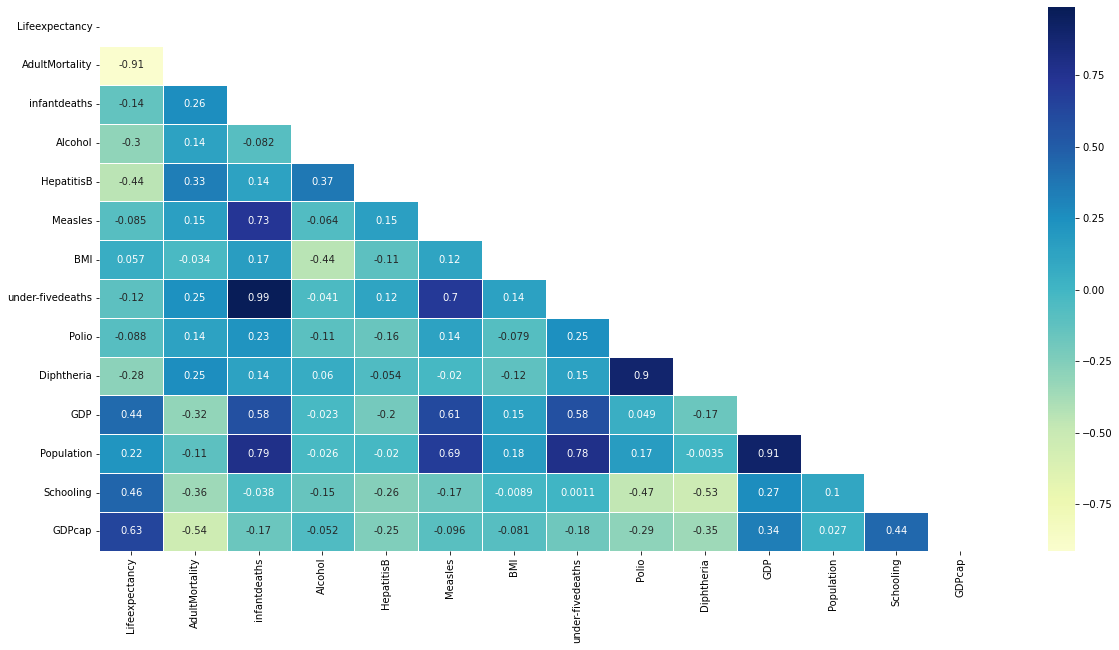

In [ ]:
#Calculate correlations and analyze. 
##Show Correlations for Develooped DF in heatmap matrix using numpy library, seaborn and matplotlib
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(df_Dev.corr(), dtype=bool))
sns.heatmap(df_Dev.corr(), center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

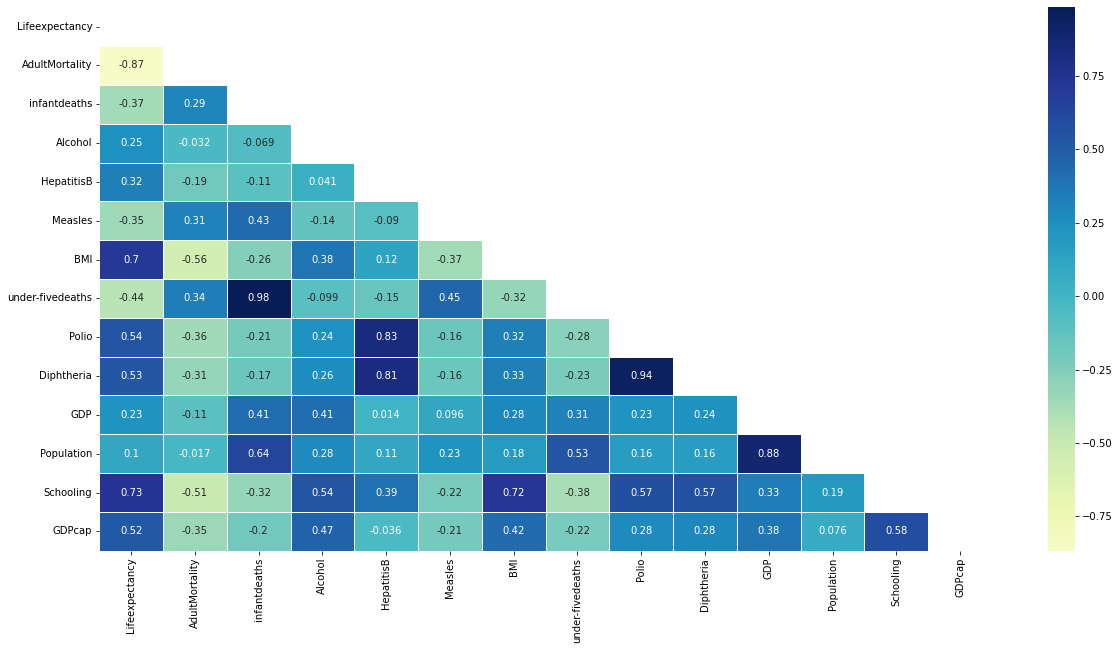

In [ ]:
#Calculate correlations and analyze. 
##Show Correlations for Develooped DF in heatmap matrix using numpy library, seaborn and matplotlib
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(df_notDev.corr(), dtype=bool))
sns.heatmap(df_notDev.corr(), center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()